In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime

In [ ]:
!kaggle datasets download -d thedevastator/unlock-profits-with-e-commerce-sales-data

Dataset URL: https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data
License(s): other
unlock-profits-with-e-commerce-sales-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('unlock-profits-with-e-commerce-sales-data.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
df = pd.read_csv('/content/Amazon Sale Report.csv')
warnings.filterwarnings("ignore")
df.head()

<ipython-input-4-9fd426eaece3>:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Amazon Sale Report.csv')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [ ]:
df.shape

(128975, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

//Displaying columns based on their dtypes


In [ ]:
df.describe(include='O')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by,Unnamed: 22
count,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,122103,121180,128942,128942,128942,79822,39277,79925
unique,120378,91,13,2,2,2,1377,7195,9,11,7190,3,1,8955,69,1,5787,1,1
top,171-5057375-2831560,05-03-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,Easy Ship,False
freq,12,2085,77804,89698,128851,88615,4224,773,50284,22711,773,109487,121180,11217,22260,128942,46100,39277,79925


In [ ]:
df.select_dtypes(include='number').columns

Index(['index', 'Qty', 'Amount', 'ship-postal-code'], dtype='object')

In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [ ]:
df3 = df.drop(columns=['index','SKU','ship-postal-code','Size','fulfilled-by','ASIN','Style','Date','promotion-ids','Unnamed: 22'],axis = 1)

In [ ]:
df3.head(2)

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-country,B2B
0,405-8078784-5731545,Cancelled,Merchant,Amazon.in,Standard,Set,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,IN,False
1,171-9198151-1101146,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,IN,False


In [ ]:
df3.isnull().sum()

,0
Order ID,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Courier Status,6872
Qty,0
currency,7795
Amount,7795


In [ ]:
df3['Courier Status'].unique()

array([nan, 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [ ]:
df3['currency'].unique()

array(['INR', nan], dtype=object)

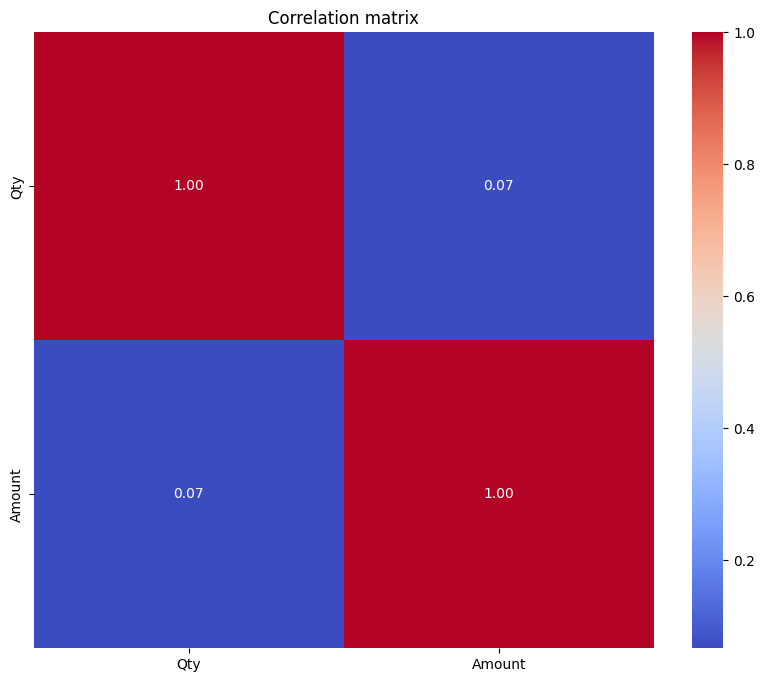

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = df3.select_dtypes(include=['number'])
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix")
plt.show()


In [ ]:
sales = df3.describe(include='O').loc['count','Order ID']
print('Total number of Sales:',sales)

Total number of Sales: 128975


In [ ]:
df3['Status'].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

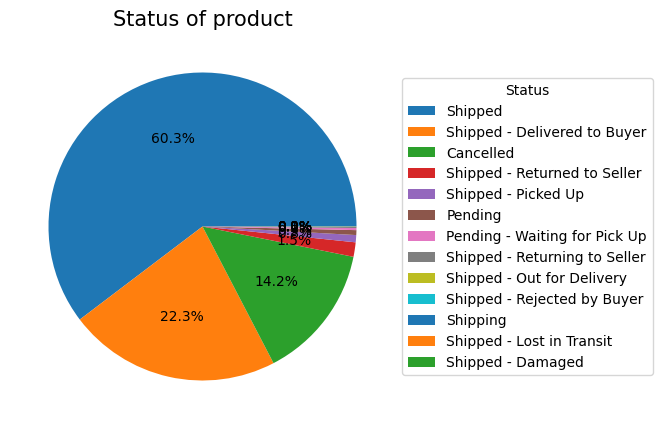

In [ ]:
# setting the size
plt.figure(figsize=(10,5))

#Distribution of preference of work
status_of_product= df3['Status'].value_counts()
plt.pie(status_of_product, labels=None,autopct='%1.1f%%')
plt.legend(status_of_product.index,title='Status',loc = 'center left',bbox_to_anchor=(1,0.5))

#Setting up the title , font size and font color
plt.title('Status of product',color = 'black',fontsize = 15)

#to show
plt.show()

In [ ]:
df3['ship-state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'MANIPUR', 'Goa', 'MEGHALAYA', 'GOA',
       'TRIPURA', 'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', 'Delhi', nan,
       'ANDAMAN & NICOBAR ', 'Punjab', 'Rajshthan', 'Manipur',
       'rajasthan', 'Odisha', 'NL', 'Bihar', 'MIZORAM', 'punjab',
       'New Delhi', 'Rajasthan', 'Punjab/Mohali/Zirakpur', 'Puducherry',
       'delhi', 'RJ', 'Chandigarh', 'orissa', 'LAKSHADWEEP', 'goa', 'PB',
       'APO', 'Arunachal Pradesh', 'AR', 'Pondicherry', 'Sikkim',
       'Arunachal pradesh', 'Nagaland', 'bihar', 'Mizoram', 'rajsthan',
       'Orissa', 'Rajsthan', 'Meghalaya'], dtype=object)

In [ ]:
df3['ship-state'].nunique()

69

In [ ]:
df3.loc[df3['ship-state'].isin(['Goa','GOA','goa']),'ship-state']='Goa'

In [ ]:
df3.loc[df3['ship-state'].isin(['rajsthan','Rajasthan','rajasthan','Rajshthan','Rajsthan','RAJASTHAN', 'RJ']),'ship-state'] = 'Rajasthan'
df3.loc[df3['ship-state'].isin(['Punjab/Mohali/Zirakpur','PB','punjab','PUNJAB']),'ship-state'] = 'Punjab'
df3.loc[df3['ship-state'].isin([ 'AR','Arunachal pradesh','ARUNACHAL PRADESH']),'ship-state'] = 'Arunachal Pradesh'
df3.loc[df3['ship-state'].isin(['NL','NAGALAND']),'ship-state'] = 'Nagaland'
df3.loc[df3['ship-state'].isin(['Puducherry']),'ship-state'] = 'Pondicherry'
df3.loc[df3['ship-state'].isin(['orissa','Odisha','ODISHA']),'ship-state'] = 'Orissa'
df3.loc[df3['ship-state'].isin(['SIKKIM']),'ship-state'] = 'Sikkim'
df3.loc[df3['ship-state'].isin(['bihar']),'ship-state'] = 'Bihar'
df3.loc[df3['ship-state'].isin(['CHANDIGARH']),'ship-state'] = 'Chandigarh'
df3.loc[df3['ship-state'].isin(['delhi','New Delhi','DELHI']),'ship-state'] = 'Delhi'

In [ ]:
df3.dropna(subset = 'ship-state', inplace = True)

In [ ]:
df3['ship-state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'Chandigarh', 'TELANGANA', 'ANDHRA PRADESH',
       'Rajasthan', 'Delhi', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'Orissa', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'Nagaland', 'Gujarat', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'Punjab', 'HIMACHAL PRADESH',
       'Arunachal Pradesh', 'MANIPUR', 'Goa', 'MEGHALAYA', 'TRIPURA',
       'LADAKH', 'DADRA AND NAGAR', 'Sikkim', 'ANDAMAN & NICOBAR ',
       'Manipur', 'Bihar', 'MIZORAM', 'Pondicherry', 'LAKSHADWEEP', 'APO',
       'Mizoram', 'Meghalaya'], dtype=object)

In [ ]:
df3['ship-state'] = df3['ship-state'].replace('Orissa','Odisha')

In [ ]:
df3['ship-state'].nunique()

42

In [ ]:
nan_string_count = df3['ship-state'].eq('Odisha').sum()
print(nan_string_count)

2139


In [ ]:
df3['ship-state'].isna().sum()

0

In [ ]:
# df.dropna(subset = 'ship-state', inplace = True)

In [ ]:
df3.isnull().sum()

,0
Order ID,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Courier Status,6869
Qty,0
currency,7793
Amount,7793


In [ ]:
#Renaming the column names
df3.rename(columns ={'Order ID':'Order_ID','Sales Channel ':'Sales_channel','ship-service-level': 'Shipment_service','Courier Status':'Courier_status','ship-state':'shipping_state','fulfilled-by':'fulfilled_by'},inplace=True)          #df.rename(columns={'old_name': 'new_name'}, inplace=True)
df3.head()

,Order_ID,Status,Fulfilment,Sales_channel,Shipment_service,Category,Courier_status,Qty,currency,Amount,ship-city,shipping_state,ship-country,B2B
0,405-8078784-5731545,Cancelled,Merchant,Amazon.in,Standard,Set,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,IN,False
1,171-9198151-1101146,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,IN,False
2,404-0687676-7273146,Shipped,Amazon,Amazon.in,Expedited,kurta,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,IN,True
3,403-9615377-8133951,Cancelled,Merchant,Amazon.in,Standard,Western Dress,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,IN,False
4,407-1069790-7240320,Shipped,Amazon,Amazon.in,Expedited,Top,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,IN,False


In [ ]:
df3['Courier_status'].fillna("Not_Specified", inplace=True)
df3['shipping_state'].fillna("Not_Specified", inplace=True)
df3['Amount'].fillna("Not_Specified", inplace=True)
df3.head(2)

,Order_ID,Status,Fulfilment,Sales_channel,Shipment_service,Category,Courier_status,Qty,currency,Amount,ship-city,shipping_state,ship-country,B2B
0,405-8078784-5731545,Cancelled,Merchant,Amazon.in,Standard,Set,Not_Specified,0,INR,647.62,MUMBAI,MAHARASHTRA,IN,False
1,171-9198151-1101146,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,IN,False


In [ ]:
df3['Shipment_service'].unique()

array(['Standard', 'Expedited'], dtype=object)

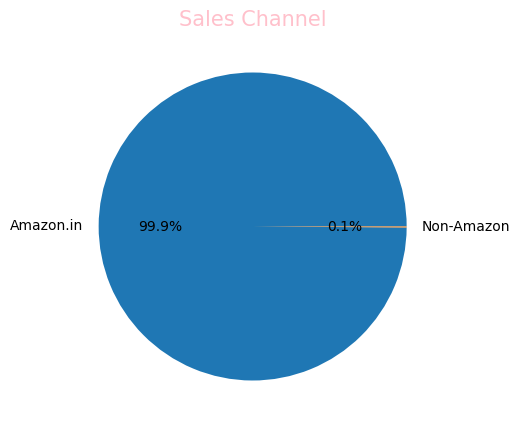

In [ ]:
plt.figure(figsize=(10,5))
Sales_channel = df3['Sales_channel'].value_counts()
plt.pie(Sales_channel,labels=Sales_channel.index,autopct='%1.1f%%')
plt.title('Sales Channel',color='pink',fontsize=15)
plt.show()

In [ ]:
df3.to_excel('Cleaned_Amazon_data.xlsx',index=False)